In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image

In [1]:

class ForwardDiffusion(nn.Module):
    def __init__(self, drift_fn, diffusion_fn):
        super(ForwardDiffusion, self).__init__()
        self.drift_fn = drift_fn
        self.diffusion_fn = diffusion_fn

    def forward(self, x, t):
        dt = t[1:] - t[:-1]  # Time step sizes

        for i in range(len(dt)):
            dw = torch.randn_like(x) * torch.sqrt(dt[i])  # Brownian increments
            drift = self.drift_fn(x, t[i])
            diffusion = self.diffusion_fn(x, t[i])
            x = x + drift * dt[i] + diffusion * dw

        return x


In [2]:
# def drift_fn(x, t):
#     # Define your drift function based on the diffusion model
#     return ...

# def diffusion_fn(x, t):
#     # Define your diffusion function based on the diffusion model
#     return ...


In [3]:
forward_diffusion = ForwardDiffusion(drift_fn, diffusion_fn)


NameError: name 'drift_fn' is not defined

In [ ]:
x0 = torch.zeros(10)  # Example initial state
t = torch.linspace(0, 1, 100)  # Example time vector

final_state = forward_diffusion(x0, t)


In [5]:
final_state

In [4]:
def forward_diffusion(image, drift, diffusion, num_steps):
    for _ in range(num_steps):
        noise = torch.randn_like(image) * diffusion
        image = image + drift * diffusion + noise
    return image

In [8]:
from torchvision import transforms

image_path = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\BUSI\train\good\normal (95).png"
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

image = transform(Image.open(image_path)).unsqueeze(0)


In [10]:
image.shape

torch.Size([1, 3, 582, 693])

In [20]:
drift = torch.tensor(0.1)  # Example drift value
diffusion = torch.tensor(0.5)  # Example diffusion value
num_steps = 1000  # Number of diffusion steps


In [21]:
diffused_image = forward_diffusion(image, drift, diffusion, num_steps)


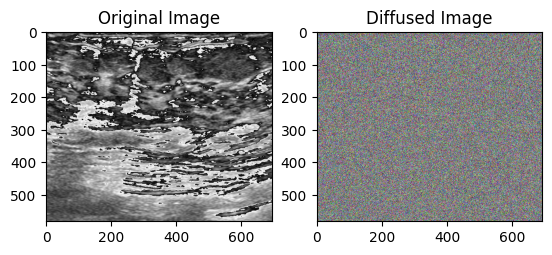

In [22]:
import matplotlib.pyplot as plt

# Convert the diffused image tensor back to PIL Image format
diffused_image_pil = transforms.ToPILImage()(diffused_image.squeeze())

# Display the original and diffused images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(transforms.ToPILImage()(image.squeeze()))
axs[0].set_title('Original Image')
axs[1].imshow(diffused_image_pil)
axs[1].set_title('Diffused Image')
plt.show()
